## Preprocessing

In [26]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
#total column names
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(['EIN', 'NAME'], axis=1)

In [4]:
#name of columns after dropping 
df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [5]:
# Determine the number of unique values in each column.
unique_counts = df.nunique()
print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_counts = df['APPLICATION_TYPE'].value_counts()
print(application_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [7]:
# Choose a cutoff value and create a list of application types to be replaced
cutoff = 528 
# use the variable name `application_types_to_replace`
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = list(application_counts[application_counts < cutoff].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = df['CLASSIFICATION'].value_counts()
print(classification_counts)

# Choose a cutoff value for low-frequency classifications (e.g., cutoff = 100)
cutoff = 100

# Create a list of classifications to replace based on the cutoff
classifications_to_replace = list(classification_counts[classification_counts < cutoff].index)

# Replace low-frequency CLASSIFICATION values in the DataFrame with "Other"
df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(classifications_to_replace, "Other")

# Check to make sure replacement was successful
print(df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64


In [9]:
# Look at CLASSIFICATION value counts to identify those that appear more than once
classification_counts = df['CLASSIFICATION'].value_counts()

# Display all classifications with counts greater than 1
classification_counts_gt_1 = classification_counts[classification_counts > 1]
print(classification_counts_gt_1)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64


In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Filter and display classifications with counts greater than 1
classification_counts_gt_1 = classification_counts[classification_counts > 1]
print(classification_counts_gt_1)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 1800
# Create a list of classifications to replace based on the cutoff
classifications_to_replace = list(classification_counts[classification_counts < cutoff].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [29]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, drop_first=True)

# Display the first few rows to verify the conversion
application_df.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10531628,1,108590,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,10547893,1,5000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10553066,1,6692,1,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,10556103,1,142590,1,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Check the shape of the features after one-hot encoding
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

Shape of X_train_scaled: (27439, 19604)
Shape of X_test_scaled: (6860, 19604)


## Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

input_features = X_train_scaled.shape[1]  # Automatically set the number of input features
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

c:\Users\Anupreet Virk\.anaconda\New folder\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │     1,568,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,570,861 (5.99 MB)

 Trainable params: 1,570,861 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7250 - loss: 0.5438 - val_accuracy: 0.8023 - val_loss: 0.4437
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9510 - loss: 0.1400 - val_accuracy: 0.5851 - val_loss: 1.1554
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9606 - loss: 0.0941 - val_accuracy: 0.5836 - val_loss: 1.1299
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9647 - loss: 0.0859 - val_accuracy: 0.5915 - val_loss: 0.9435
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9645 - loss: 0.0840 - val_accuracy: 0.5829 - val_loss: 1.1252
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9625 - loss: 0.0872 - val_accuracy: 0.5831 - val_loss: 1.0014
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9619 - loss: 0.0896 - val_accuracy: 0.5829 - val_loss: 1.0784
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9627 - loss: 0.0868 - val_accu

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - 3ms/step - accuracy: 0.6832 - loss: 0.8913
Loss: 0.8912908434867859, Accuracy: 0.6832361221313477


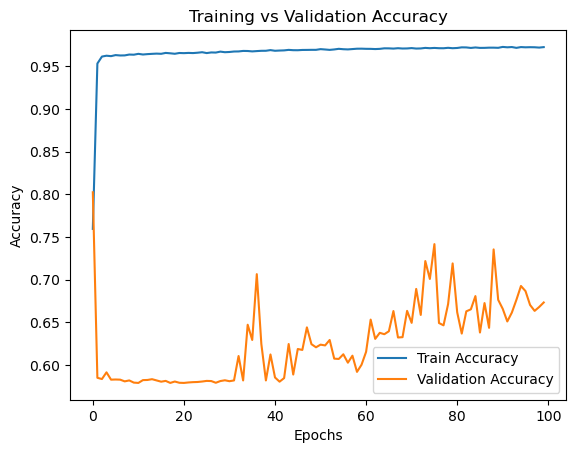

In [25]:

#  code for plotting training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')  # Save the plot
plt.show()

In [20]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')